In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import numpy as np # for mathematical calculations
import pandas as pd
from datetime import datetime # to access datetime

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting
from wordcloud import WordCloud # for word cloud

# for text processing
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from collections import Counter
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from multiprocessing import Pool

# warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/DSO 560/Project/Data'

Mounted at /content/drive


In [ ]:
# Define the CSV file path
csv_file = 'restaurants.csv'

# Read csv data
data = pd.read_csv(os.path.join(path, csv_file))
data

,name,state,restaurant_stars,review_count,attributes,categories,user_stars,useful,funny,cool,text,date
0,St Honore Pastries,PA,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,0.0,0.0,1.0,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,St Honore Pastries,PA,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,3.0,1.0,2.0,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,St Honore Pastries,PA,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",5.0,0.0,0.0,0.0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,St Honore Pastries,PA,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",5.0,5.0,0.0,5.0,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,St Honore Pastries,PA,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,2.0,1.0,1.0,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...
3773767,The Plum Pit,DE,4.5,14.0,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...",5.0,0.0,0.0,0.0,This is my favorite food truck! I only wish I ...,2019-07-14 14:25:35
3773768,The Plum Pit,DE,4.5,14.0,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...",5.0,1.0,0.0,1.0,This food truck was stupid. Stupidly delicious...,2021-06-25 23:22:26
3773769,The Plum Pit,DE,4.5,14.0,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...",5.0,0.0,0.0,0.0,Bubba never disappoints i go to his fb page an...,2016-12-09 21:38:05
3773770,The Plum Pit,DE,4.5,14.0,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...",1.0,0.0,0.0,0.0,The truck was invited to our office for a part...,2020-02-19 22:59:06


In [ ]:
############################

# Sample Data

In [ ]:
import random

sample_restaurant = random.choice(data['name'].unique())
sample_restaurant

"Luke's Sports Shack Bar & Grill"

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the stemmer, lemmatizer, and sentiment analyzer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

# Sample review
reviews = data[data['name'] == sample_restaurant]['text']

for review in reviews:
  # Tokenize the review
  word_token = word_tokenize(review)

  # Remove stopwords, stem, and lemmatize
  stop_words = set(stopwords.words('english'))
  stop_words.update(['you, them, theirs, their, I, mine, he, she, u, they', 'santa', 'barbara',
                      'always', 'also', 'would', 'will', 'us', 'lot', 'yet', 'one', 'would', 'come',
                      'like', 'go'])
  stemmed_tokens = [stemmer.stem(lemmatizer.lemmatize(token.lower())) for token in word_token if token.isalpha() and token.lower() not in stop_words]


In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

def all_tokens_by_company(reviews):
  stemmer = PorterStemmer()
  sia = SentimentIntensityAnalyzer()

  dataset_tokens = []

  stop_words = set(stopwords.words('english'))
  stop_words.update(['you, them, theirs, their, I, mine, he, she, u, they', 'santa', 'barbara',
                     'always', 'also', 'would', 'will', 'us', 'lot', 'yet', 'one', 'would', 'come',
                     'like', 'go'])


  for review in reviews:
      word_token = word_tokenize(review)
      review_token_list = [stemmer.stem(lemmatizer.lemmatize(token.lower(), pos='v')) for token in word_token if token.isalpha() and token.lower() not in stop_words]
      dataset_tokens.extend(review_token_list)
  return dataset_tokens

In [ ]:
reviews = data[data['name'] == sample_restaurant]['text']
token_list = all_tokens_by_company(reviews)

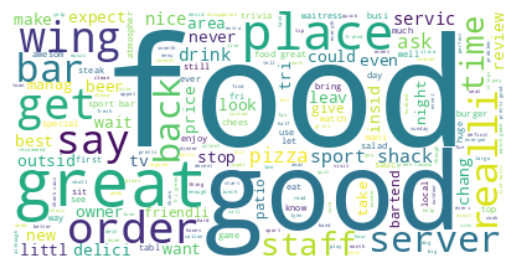

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['you, them, theirs, their, I, mine, he, she, u, they', 'santa', 'barbara',
                    'always', 'also', 'would', 'will', 'us', 'lot', 'yet', 'one', 'would', 'come',
                    'like', 'go'])

# Calculate frequency distribution of words
freq_dist = FreqDist(token_list)

# word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(token_list))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# CA Data

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stem = [stemmer.stem('savory')]
lemma = [lemmatizer.lemmatize('', pos = 'v')]

print(stem)
print(lemma)

['savori']
['savori']


In [ ]:
dataset_tokens = []
CA = data[data['state'] == 'CA']
stop_words = set(stopwords.words('english'))
for review in CA['text']:
  word_token = word_tokenize(review)
  review_token_list = [stemmer.stem(token).lower() for token in word_token if token.isalpha() and token.lower() not in stop_words]
  dataset_tokens.extend([lemmatizer.lemmatize(token, pos='v') for token in review_token_list])

dataset_tokens

['great',
 'addit',
 'funk',
 'zone',
 'grab',
 'bite',
 'grab',
 'tast',
 'life',
 'good',
 'right',
 'next',
 'door',
 'santa',
 'barbara',
 'wine',
 'collect',
 'fact',
 'actual',
 'share',
 'tabl',
 'fabul',
 'savori',
 'croissant',
 'possibl',
 'best',
 'breakfast',
 'sandwich',
 'ever',
 'biscuit',
 'oh',
 'gosh',
 'good',
 'pricey',
 'ham',
 'chees',
 'croissant',
 'anywher',
 'santa',
 'barbra',
 'delici',
 'cute',
 'space',
 'bite',
 'hard',
 'find',
 'green',
 'egg',
 'ham',
 'breakfast',
 'biscuit',
 'die',
 'think',
 'santa',
 'barbra',
 'tri',
 'tip',
 'sandwich',
 'excel',
 'cold',
 'brew',
 'coffe',
 'good',
 'lot',
 'good',
 'choic',
 'grab',
 'go',
 'section',
 'salami',
 'pesto',
 'sammi',
 'also',
 'great',
 'go',
 'back',
 'kid',
 'without',
 'doubt',
 'best',
 'food',
 'ever',
 'life',
 'bread',
 'best',
 'believ',
 'chocol',
 'croissant',
 'ambienc',
 'wonder',
 'intrigu',
 'chic',
 'peopl',
 'friendli',
 'kind',
 'coffe',
 'look',
 'great',
 'tri',
 'yet',
 'back

In [ ]:
word_freq = nltk.FreqDist(dataset_tokens)

# Convert to DataFrame for easier manipulation
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
word_freq_df.head(30)

,Word,Frequency
63,food,114895
92,place,92395
8,good,90803
122,get,79633
0,great,79539
154,order,72011
53,go,66884
79,servic,63447
323,come,62323
235,time,53864


In [ ]:
# function to calculate the sentiment score of each review
def sentiment_review(reviews):
  stemmer = PorterStemmer()
  sia = SentimentIntensityAnalyzer()

  all_review = []
  all_review_sentiment = []
  dataset_tokens = []

  stop_words = set(stopwords.words('english'))
  stop_words.update(['you, them, theirs, their, I, mine, he, she, u, they', 'santa', 'barbara',
                     'always', 'also', 'would', 'will', 'us', 'lot', 'yet', 'one', 'would', 'come',
                     'like', 'go'])


  for review in reviews:
      word_token = word_tokenize(review)
      review_token_list = [stemmer.stem(token).lower() for token in word_token if token.isalpha() and token.lower() not in stop_words]
      all_review.append(review_token_list)
      sentiment_score = sia.polarity_scores(' '.join(review_token_list))
      all_review_sentiment.append(sentiment_score['compound'])
      dataset_tokens.extend(review_token_list)
  return all_review, all_review_sentiment

In [ ]:
CA = data[data['state'] == 'CA']

In [ ]:
tokens_CA, sentiment_CA = sentiment_review(CA['text'])

In [ ]:
CA['tokens'] = tokens_CA

In [ ]:
CA['sentiment'] = sentiment_CA

In [ ]:
CA

,name,state,restaurant_stars,review_count,attributes,categories,user_stars,useful,funny,cool,text,date,tokens,sentiment
1763,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,0.0,0.0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47,"[great, addit, funk, zone, grab, bite, grab, t...",0.8481
1764,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,0.0,0.0,Possibly the best breakfast sandwich EVER. On...,2017-01-15 00:36:04,"[possibl, best, breakfast, sandwich, ever, bis...",0.7964
1765,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",4.0,0.0,0.0,0.0,Pricey ( a ham and cheese croissant was $5.50)...,2018-07-17 00:20:41,"[pricey, ham, chees, croissant, anywher, barbr...",0.8910
1766,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,1.0,1.0,Are you kidding me? This is without a doubt so...,2018-01-09 20:44:47,"[kid, without, doubt, best, food, ever, life, ...",0.7829
1767,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",2.0,3.0,0.0,0.0,"Super slow service, ""salads"" are not very good...",2017-02-09 19:09:31,"[super, slow, servic, salad, good, realli, pri...",0.7783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772368,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",1.0,5.0,0.0,0.0,I was pretty stoked when Kyle's kitchen replac...,2020-11-20 03:25:38,"[pretti, stoke, kyle, kitchen, replac, silver,...",0.8979
3772369,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",2.0,0.0,0.0,0.0,"Ordered via doordash, about 7:50pm was tired s...",2021-03-22 04:22:52,"[order, via, doordash, tire, wife, decid, orde...",0.8779
3772370,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",1.0,0.0,0.0,0.0,I've been eating at and supporting the SIlverg...,2021-11-19 23:29:33,"[eat, support, silvergreen, famili, restaur, l...",0.7783
3772371,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",1.0,0.0,0.0,0.0,i LOVE burgers and the burgers from this kyles...,2020-12-01 02:47:52,"[love, burger, burger, kyle, realli, good, loc...",0.7579


In [ ]:
# Specify the file path where you want to save the CSV file
file_path_CA = '/content/drive/My Drive/DSO 560/Project/Data/CA_clean_data.csv'

# Use the to_csv() method to save the DataFrame to a CSV file
CA.to_csv(file_path_CA, index=False)

In [ ]:
######################

# Aggregate Restaurant Sentiment

In [ ]:
aggregate_data = CA.groupby('name')[['sentiment', 'user_stars']].mean()
aggregate_data

,sentiment,user_stars
name,,
101 Deli,0.767979,4.607143
1114 Sports Bar & Games,0.703075,3.938356
4 Eggs & Pizza,0.737854,4.819672
A Piece of Cake,0.565933,2.083333
A Slice of Woodstock's,0.615080,3.800000
...,...,...
Your Place Thai Restaurant,0.661548,3.857143
Zaytoon,0.715333,4.173547
Zen Yai Thai Cuisine,0.693405,3.897727


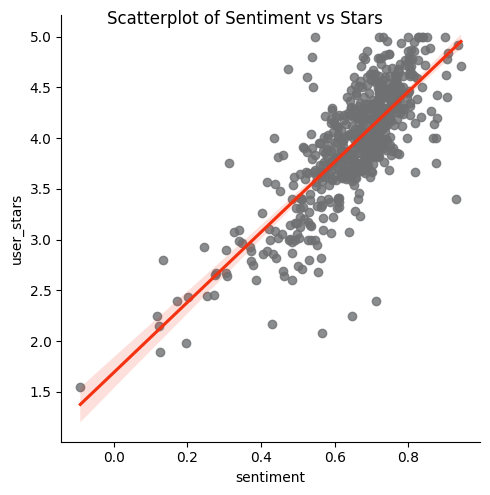

In [ ]:
dot_color = '#6e7072'  # grey
line_color = '#f43212'  # red

# Create the lmplot with specified dot color and line color
plot = sns.lmplot(data=aggregate_data, x='sentiment', y='user_stars', scatter_kws={'color': dot_color}, line_kws={'color': line_color})
plot.fig.suptitle('Scatterplot of Sentiment vs Stars')
# Show the plot
plt.show()

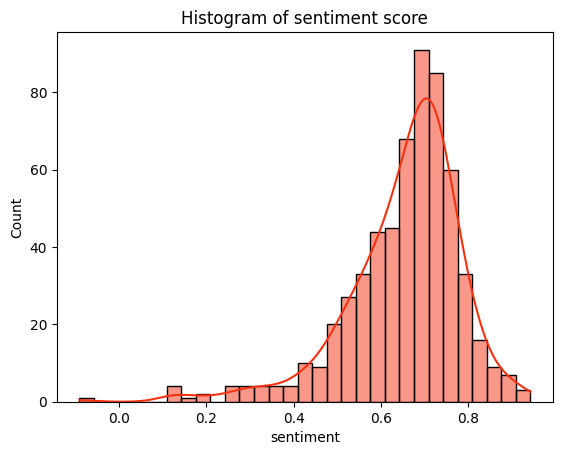

In [ ]:
dot_color = '#6e7072'  # grey
line_color = '#f43212'  # red

plot = sns.histplot(aggregate_data.sentiment, kde=True, color=line_color, line_kws={'color': line_color})
plot.set(title='Histogram of sentiment score')
plt.show()

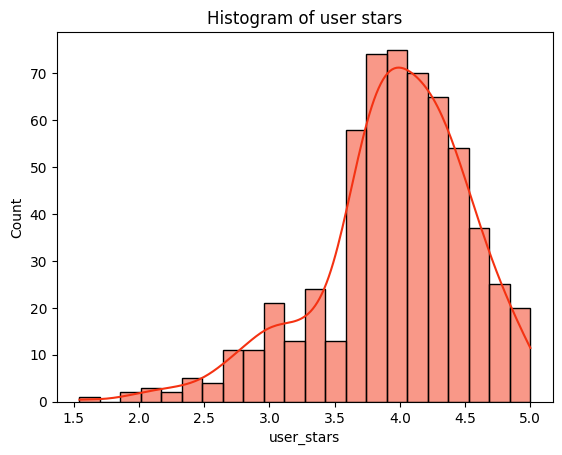

In [ ]:
plot = sns.histplot(aggregate_data.user_stars, kde=True, color=line_color, line_kws={'color': line_color})
plot.set(title='Histogram of user stars')
plt.show()

In [ ]:
##############################